In [ ]:
import os

In [ ]:
index_file = '../all_scenes_indices.pt'

In [ ]:
csr_dir = '/srv/flash1/gchhablani3/housekeep/csr_raw/beechwood_0_int/baseline_phasic_oracle/csr'

In [84]:
files = os.listdir(csr_dir)

In [85]:
len(files)

2221

In [10]:
path = os.path.join(csr_dir, files[0])

In [31]:
path

'/srv/flash1/gchhablani3/housekeep/csr_raw/beechwood_0_int/baseline_phasic_oracle/csr/csr_220.json'

In [11]:
import json
with open(path) as f:
    data = json.load(f)

In [12]:
data.keys()

dict_keys(['rgb', 'mask', 'depth', 'items'])

In [14]:
data['items'][0].keys()

dict_keys(['iid', 'sim_id', 'obj_key', 'type', 'bounding_box', 'cropped_image'])

In [36]:
data['items'][0]['bounding_box']

[102, 161, 148, 177]

In [15]:
import matplotlib.pyplot as plt

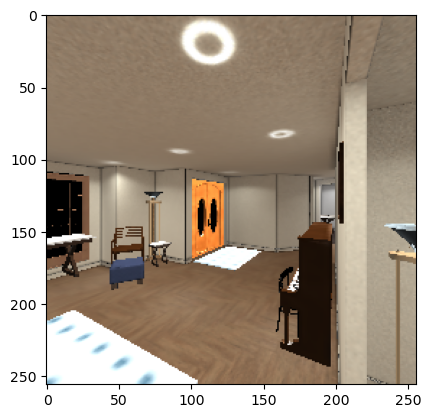

In [17]:
plt.imshow(data['rgb'])

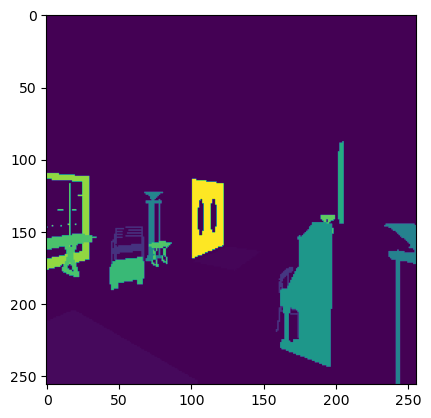

In [16]:
plt.imshow(data['mask'])

In [30]:
data['items'][10]['sim_id']

116

In [ ]:
data['items'][10]['si']

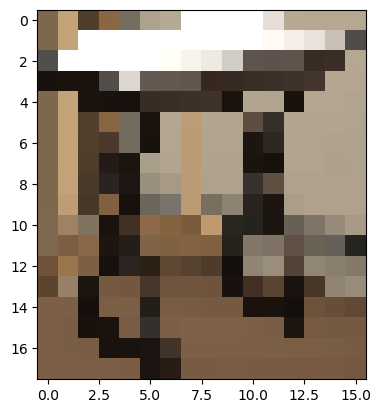

In [28]:
plt.imshow(data['items'][10]['cropped_image'])

In [40]:
# from tqdm.notebook import tqdm

In [67]:
iid_frame_dict = {}
iids = []
for fil in files:
    path = os.path.join(csr_dir, fil)
    with open(path) as f:
        data = json.load(f)
    for item in data['items']:
        if item['iid'] not in iids:
            iids.append(item['iid'])
        if item['iid'] not in iid_frame_dict:
            iid_frame_dict[item['iid']] = {}
        for item_2 in data['items']:
            if item_2['iid'] not in iid_frame_dict[item['iid']]:
                iid_frame_dict[item['iid']][item_2['iid']] = [path]
            else:
                iid_frame_dict[item['iid']][item_2['iid']].append(path)

In [68]:
import numpy as np

In [69]:
arr = np.zeros((len(iids), len(iids), len(files)))
for iid in iid_frame_dict.keys():
    for iid_2 in iid_frame_dict[iid].keys():
        for fil in iid_frame_dict[iid][iid_2]:
            arr[iids.index(iid), iids.index(iid_2), files.index(fil.split('/')[-1])] = 1

In [70]:
arr.shape

(115, 115, 304)

In [71]:
import torch

In [72]:
torch.save({
    'iids': iids,
    'files': files,
    'arr': arr
}, 'beechwood_0_int.pt')

In [73]:
dat = torch.load('beechwood_0_int.pt')

In [74]:
iids

[1,
 2,
 12,
 13,
 36,
 37,
 43,
 50,
 55,
 58,
 59,
 61,
 62,
 68,
 81,
 44,
 51,
 65,
 67,
 78,
 85,
 101,
 113,
 14,
 15,
 16,
 17,
 18,
 21,
 24,
 27,
 29,
 30,
 63,
 75,
 76,
 89,
 93,
 100,
 104,
 28,
 70,
 41,
 60,
 77,
 40,
 47,
 52,
 64,
 31,
 109,
 54,
 69,
 71,
 4,
 19,
 20,
 25,
 26,
 32,
 34,
 53,
 56,
 74,
 79,
 80,
 92,
 95,
 35,
 49,
 107,
 5,
 8,
 57,
 72,
 108,
 106,
 23,
 38,
 39,
 42,
 112,
 33,
 73,
 83,
 66,
 96,
 102,
 103,
 87,
 99,
 6,
 7,
 9,
 10,
 11,
 84,
 82,
 110,
 111,
 22,
 90,
 91,
 94,
 105,
 48,
 45,
 46,
 88,
 98,
 114,
 86,
 3,
 115,
 97]

In [77]:
iid_frame_dict.keys()

dict_keys([1, 2, 12, 13, 36, 37, 43, 50, 55, 58, 59, 61, 62, 68, 81, 44, 51, 65, 67, 78, 85, 101, 113, 14, 15, 16, 17, 18, 21, 24, 27, 29, 30, 63, 75, 76, 89, 93, 100, 104, 28, 70, 41, 60, 77, 40, 47, 52, 64, 31, 109, 54, 69, 71, 4, 19, 20, 25, 26, 32, 34, 53, 56, 74, 79, 80, 92, 95, 35, 49, 107, 5, 8, 57, 72, 108, 106, 23, 38, 39, 42, 112, 33, 73, 83, 66, 96, 102, 103, 87, 99, 6, 7, 9, 10, 11, 84, 82, 110, 111, 22, 90, 91, 94, 105, 48, 45, 46, 88, 98, 114, 86, 3, 115, 97])

In [79]:
for iid in iid_frame_dict.keys():
     print(len(iid_frame_dict[iid][iid]))

53
52
48
22
8
36
33
29
44
50
42
25
23
47
45
19
8
3
18
16
8
9
11
29
29
27
30
24
41
29
36
30
32
36
27
27
29
25
22
22
45
38
26
31
34
12
9
12
17
15
24
43
41
22
16
20
23
14
17
34
15
18
31
14
17
17
8
14
28
32
13
22
14
23
23
15
15
20
18
21
22
11
23
20
23
24
21
17
17
20
19
15
15
9
8
9
29
12
14
16
15
10
12
7
10
7
12
7
14
14
3
11
6
2
2


In [82]:
for iid in iid_frame_dict.keys():
    s = 0
    for iid_2 in iid_frame_dict[iid].keys():
        if iid != iid_2:
            s += len(iid_frame_dict[iid][iid_2])
    print(s)

444
534
463
258
72
331
328
247
457
475
416
209
187
455
381
83
51
15
93
81
59
49
108
481
493
446
469
442
572
527
644
548
487
576
464
419
417
495
406
422
419
336
210
249
286
46
24
51
73
66
332
403
381
137
206
312
467
309
368
560
195
378
502
309
298
213
198
354
198
189
141
201
133
184
164
180
167
374
306
350
357
102
250
389
144
224
200
269
273
174
159
122
132
97
82
89
203
165
150
204
316
218
277
186
218
45
45
47
257
255
36
205
35
21
7
